In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import cv2

In [5]:
im1 = cv2.imread('input/leaves.png')

In [6]:
im2 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

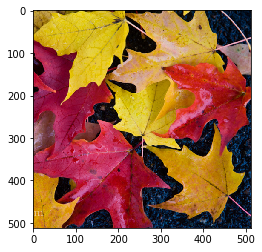

In [7]:
plt.imshow(im2)

In [8]:
im3 = im2.copy()

In [9]:
channel_red = im3[:,:,0]
channel_green = im3[:,:,1]
channel_blue = im3[:,:,2]


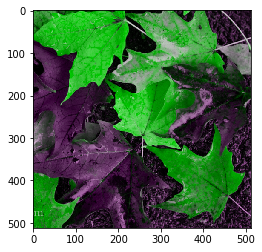

In [10]:
im3[:,:,0] = channel_blue
plt.imshow(im3)

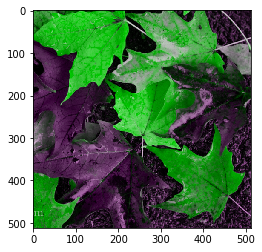

In [11]:
im3[:,:,2] = channel_red
plt.imshow(im3)

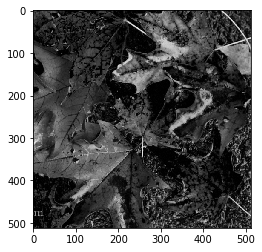

In [12]:
plt.imshow(channel_red,'gray')

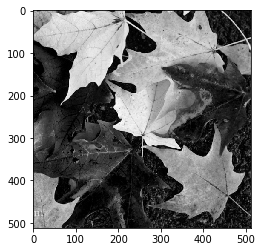

In [13]:
plt.imshow(channel_green,'gray')

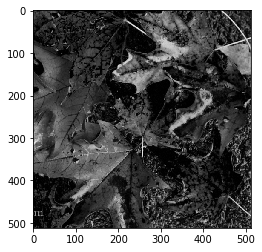

In [14]:
plt.imshow(channel_blue,'gray')

156
356


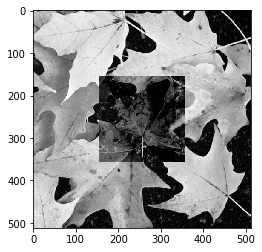

In [15]:
im3 = im2.copy()
channel_red = im3[:,:,0]
width = 200
start = int(512/2 - width / 2)
end = start + width
print(start)
print(end)
channel_red[start:end,start:end] = channel_blue[start:end,start:end]
plt.imshow(channel_red,'gray')

avg:150.84
max:253
min:0
std:74.95


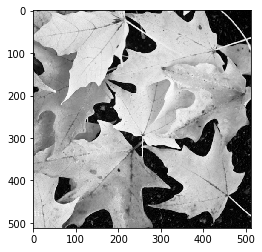

In [16]:
im3 = im2.copy()
channel_red = im3[:,:,0]

print('avg:%.2f' % np.average(channel_red))
print('max:%d' % np.max(channel_red))
print('min:%d' % np.min(channel_red))
print('std:%.2f' % np.std(channel_red))

#channel_red = (channel_red - (np.average(channel_red))) 
channel_red = (channel_red - np.average(channel_red)) / np.std(channel_red) 

channel_red = channel_red * 10
channel_red += (np.average(channel_red))
plt.imshow(channel_red,'gray')

In [17]:
channel_red

array([[  4.82414241,   5.22440844,   6.29178453, ..., -19.45866365,
        -19.85892968, -19.99235169],
       [  3.08965626,   3.75676632,   6.02494051, ..., -19.45866365,
        -19.45866365, -19.05839761],
       [  4.02361034,   3.48992229,   5.22440844, ..., -19.72550767,
        -19.05839761, -17.59075549],
       ...,
       [  7.22573861,   7.35916062,   6.69205056, ..., -19.59208566,
        -19.59208566, -19.32524164],
       [  5.62467447,   7.89284867,   7.62600464, ..., -20.1257737 ,
        -19.45866365, -19.45866365],
       [  5.22440844,   7.22573861,   7.35916062, ..., -19.99235169,
        -19.99235169, -19.32524164]])

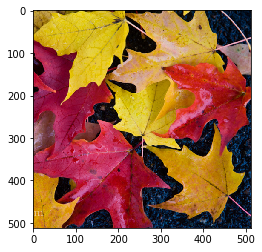

In [18]:
im2 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im3 = im2.copy()
plt.imshow(im3)

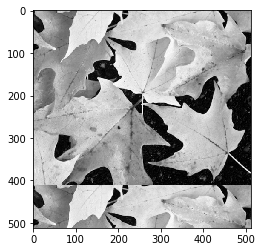

In [19]:
channel_red = im3[:,:,0]
channel_red[0:-100,:] = channel_red[100:,:]
channel_red[-100:,:] = im3[:100,:,0]

plt.imshow(channel_red,'gray')


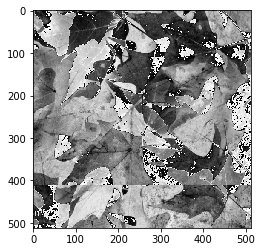

In [20]:
diff_red = channel_red - channel_green
plt.imshow(diff_red,'gray')


In [21]:
print('min:%d' % np.min(diff_red))

min:0


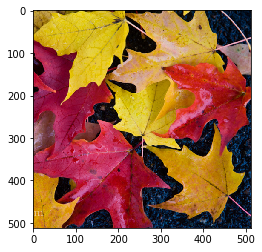

In [22]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

im1 = cv2.imread('input/leaves.png')
im2 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
plt.imshow(im2)

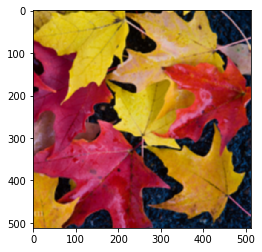

In [23]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

im1 = cv2.imread('input/leaves.png')
im2 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im3 = im2.copy()
gaussian = cv2.GaussianBlur(im3, (5,5), 5, 5)
plt.imshow(gaussian)


In [24]:
#cv2.GaussianBlur?

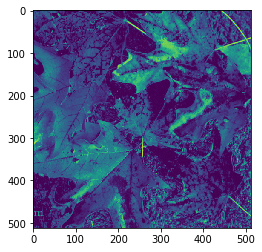

In [25]:
channel_red = im3[:,:,0]
channel_green = im3[:,:,1]
channel_blue = im3[:,:,2]
plt.imshow(channel_blue)


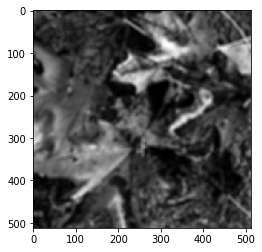

In [26]:
gaussian = cv2.GaussianBlur(channel_blue, (11,11), 5, 5)
plt.imshow(gaussian, 'gray')

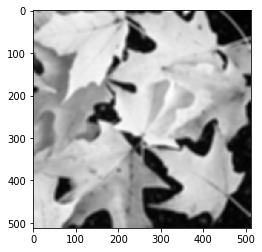

In [27]:
gaussian = cv2.GaussianBlur(channel_red, (11,11), 5, 5)
plt.imshow(gaussian, 'gray')

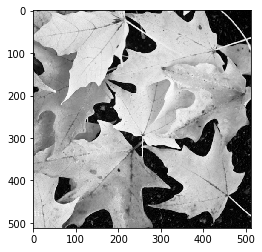

In [28]:
channel_red
plt.imshow(channel_red,'gray')

In [29]:
#eye = np.eye(3)
#m = [[1,1,1],[1,1,1],[1,1,1]]
#channel_red @ eye

In [30]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import pylab

def convolve2d(image, kernel):
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output


/home/company/anaconda3/envs/pillow/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


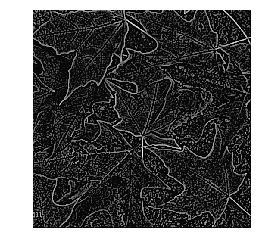

In [31]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure
img = io.imread('input/leaves.png')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
# apply sharpen filter to the original image
#sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpen_kernel = np.array([[0,1,0],[1,1,1],[0,1,0]])
image_sharpen = scipy.signal.convolve2d(img, sharpen_kernel, 'valid')
# apply edge detection filter to the sharpen image
edge_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edges = scipy.signal.convolve2d(image_sharpen, edge_kernel, 'valid')
# apply blur filter to the edge detection filtered image
blur_kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9.0;
denoised = scipy.signal.convolve2d(edges, blur_kernel, 'valid')
# Adjust the contrast of the filtered image by applying Histogram Equalization
denoised_equalized = exposure.equalize_adapthist(denoised/np.max(np.abs(denoised)), clip_limit=0.03)
plt.imshow(denoised_equalized, cmap=plt.cm.gray)    # plot the denoised_clipped
plt.axis('off')
plt.show()

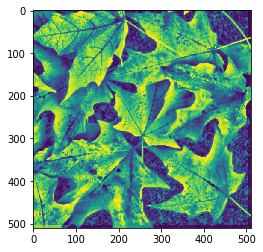

In [32]:
import cv2
import skimage

im3 = io.imread('input/leaves.png')    # Load the image
#im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
channel_red = im3[:,:,0]

kernel = np.array([[0,1,0],[1,1,1],[0,1,0]])
convolve = scipy.signal.convolve2d(channel_red, kernel, 'valid')
equalized = exposure.equalize_adapthist(convolve/np.max(np.abs(convolve)), clip_limit=0.03)
#plt.imshow(equalized, cmap=plt.cm.gray)    # plot the denoised_clipped
#plt.imshow(im3)    # plot the denoised_clipped
plt.imshow(equalized)    # plot the denoised_clipped
#plt.imshow(convolve,'gray')    # plot the denoised_clipped
#plt.imshow(convolve)    # plot the denoised_clipped


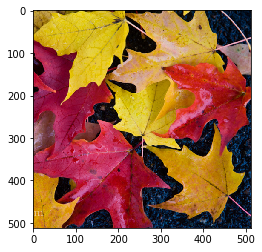

In [33]:
im3 = io.imread('input/leaves.png')    # Load the image
plt.imshow(im3)    # plot the denoised_clipped


/home/company/anaconda3/envs/pillow/lib/python3.6/site-packages/skimage/color/colorconv.py:269: RuntimeWarning: divide by zero encountered in true_divide
  out_s = delta / out_v
/home/company/anaconda3/envs/pillow/lib/python3.6/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/home/company/anaconda3/envs/pillow/lib/python3.6/site-packages/skimage/color/colorconv.py:283: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


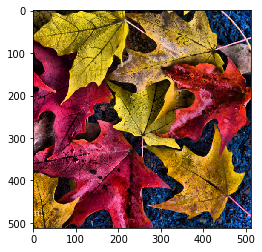

In [34]:
import cv2
import skimage

im3 = io.imread('input/leaves.png')    # Load the image
equalized = exposure.equalize_adapthist(im3/np.max(np.abs(im3)), clip_limit=0.03)
plt.imshow(equalized)    # plot the denoised_clipped


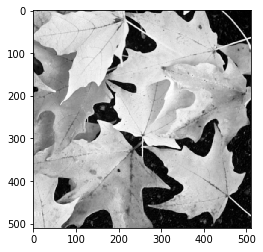

In [35]:
import cv2
import skimage

im3 = io.imread('input/leaves.png')    # Load the image
channel_red = im3[:,:,0]

kernel = np.array([[0,1,0],[1,1,1],[0,1,0]])
convolve = scipy.signal.convolve2d(channel_red, kernel, 'valid')
plt.imshow(convolve,'gray')    # plot the denoised_clipped


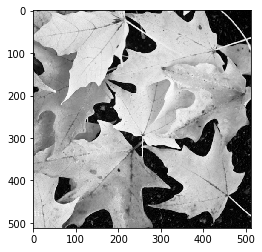

In [36]:
import cv2
import skimage

im3 = io.imread('input/leaves.png')    # Load the image
channel_red = im3[:,:,0]
plt.imshow(channel_red,'gray')    # plot the denoised_clipped


[[187 190 198 ...   5   2   1]
 [174 179 196 ...   5   5   8]
 [181 177 190 ...   3   8  19]
 ...
 [205 206 201 ...   4   4   6]
 [193 210 208 ...   0   5   5]
 [190 205 206 ...   1   1   6]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[179 196 197 ...   3   5   5]
 [177 190 198 ...   1   3   8]
 [189 182 186 ...   0   2   6]
 ...
 [202 199 200 ...   8   9   2]
 [206 201 206 ...   4   4   4]
 [210 208 204 ...   7   0   5]]


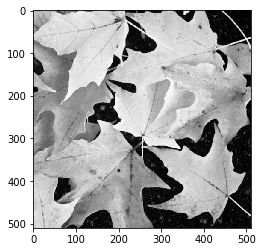

In [37]:
import cv2
import skimage

im3 = io.imread('input/leaves.png')    # Load the image
channel_red = im3[:,:,0]
print(channel_red)

eye = np.eye(3)
print(eye)
kernel = np.array([[0,0,0],[0,1,0],[0,0,0]])
convolve = scipy.signal.convolve2d(channel_red, kernel, 'valid')
#convolve = scipy.signal.convolve2d(channel_red, kernel, 'valid')
diff = convolve - channel_red[:510,:510] 
print(convolve)
plt.imshow(convolve,'gray')    # plot the denoised_clipped

In [38]:
scipy.signal.convolve2d??

In [39]:
import numpy as np
a = np.arange(100).reshape(10,10)
print(a)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


In [40]:
kernel = np.arange(121).reshape(11,11)
print(kernel)

[[  0   1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20  21]
 [ 22  23  24  25  26  27  28  29  30  31  32]
 [ 33  34  35  36  37  38  39  40  41  42  43]
 [ 44  45  46  47  48  49  50  51  52  53  54]
 [ 55  56  57  58  59  60  61  62  63  64  65]
 [ 66  67  68  69  70  71  72  73  74  75  76]
 [ 77  78  79  80  81  82  83  84  85  86  87]
 [ 88  89  90  91  92  93  94  95  96  97  98]
 [ 99 100 101 102 103 104 105 106 107 108 109]
 [110 111 112 113 114 115 116 117 118 119 120]]


In [41]:
import skimage

In [42]:
convolve = scipy.signal.convolve2d(a, kernel, 'valid')
print(convolve)

[[175725 180675]
 [230175 235125]]


In [43]:
len(channel_red[0,:])

512

In [44]:
convolve = scipy.signal.convolve2d(channel_red, kernel, 'valid')
len(convolve[0,:])

502

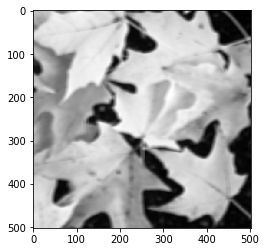

In [45]:
plt.imshow(convolve,'gray')    # plot the denoised_clipped

In [47]:
import numpy as np
a = np.arange(121).reshape(11,11)
print(a)

[[  0   1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20  21]
 [ 22  23  24  25  26  27  28  29  30  31  32]
 [ 33  34  35  36  37  38  39  40  41  42  43]
 [ 44  45  46  47  48  49  50  51  52  53  54]
 [ 55  56  57  58  59  60  61  62  63  64  65]
 [ 66  67  68  69  70  71  72  73  74  75  76]
 [ 77  78  79  80  81  82  83  84  85  86  87]
 [ 88  89  90  91  92  93  94  95  96  97  98]
 [ 99 100 101 102 103 104 105 106 107 108 109]
 [110 111 112 113 114 115 116 117 118 119 120]]


In [66]:
a = np.maximum( a, a.transpose() )
print(a)

[[  0  11  22  33  44  55  66  77  88  99 110]
 [ 11  12  23  34  45  56  67  78  89 100 111]
 [ 22  23  24  35  46  57  68  79  90 101 112]
 [ 33  34  35  36  47  58  69  80  91 102 113]
 [ 44  45  46  47  48  59  70  81  92 103 114]
 [ 55  56  57  58  59  60  71  82  93 104 115]
 [ 66  67  68  69  70  71  72  83  94 105 116]
 [ 77  78  79  80  81  82  83  84  95 106 117]
 [ 88  89  90  91  92  93  94  95  96 107 118]
 [ 99 100 101 102 103 104 105 106 107 108 119]
 [110 111 112 113 114 115 116 117 118 119 120]]


In [48]:
k = np.arange(25).reshape(5,5)
print(k)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [71]:
convolve = scipy.signal.convolve2d(a, k,'same')
print(convolve)

[[  672  1320  2235  3230  4345  5500  6655  7810  8965  8300  7104]
 [ 1512  2772  4500  6190  8120 10170 12260 14350 16440 14880 12500]
 [ 2895  4980  7800 10300 13200 16340 19600 22900 26200 23400 19435]
 [ 4150  6470  9500 11400 13900 16800 19940 23200 26500 23650 19630]
 [ 5765  8440 11760 13100 15000 17500 20400 23540 26800 23900 19825]
 [ 7580 10770 14500 15360 16700 18600 21100 24000 27140 24150 20020]
 [ 9395 13300 17600 18100 18960 20300 22200 24700 27600 24440 20215]
 [11210 15830 20900 21200 21700 22560 23900 25800 28300 24850 20450]
 [13025 18360 24200 24500 24800 25300 26160 27500 29400 25500 20805]
 [14476 20160 26280 26570 26860 27150 27640 28490 29820 25260 20232]
 [14064 19444 25175 25430 25685 25940 26195 26650 27465 22920 18000]]


In [64]:
b = scipy.signal.convolve2d(convolve,a,'same')
print(b)

[[  3653424   4581035   5588846   6678352   7717948   8673434   8606132
    8282208   7657462   6942051   6134480]
 [  6288055   7819476   9466342  11230448  12887319  14384234  14167513
   13540642  12438026  11207400   9846969]
 [ 10005526  12365102  14881968  17558219  20040210  22251364  21794254
   20720831  18938440  16984094  14855698]
 [ 14998832  18447208  22101319  25963560  29508766  32630564  31822130
   30130720  27430349  24507478  21359712]
 [ 21448868  26276955  31364562  36714374  41581296  45822604  44523648
   42011078  38120434  33951475  29501516]
 [ 29443666  35947546  42766676  49903996  56339996  61890528  59934436
   56375324  51006700  45302246  39259022]
 [ 38065804  46247477  54762830  63614698  71482176  78150068  75312720
   70524778  63550830  56223357  48539524]
 [ 45731280  55369874  65347483  75666752  84747646  92352196  88706066
   82805880  74394977  65626544  56497936]
 [ 51695294  62415058  73461032  84835561  94771970 103020572  98706462
   91911

In [67]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# let the signal be box-like
signal = np.repeat([0., 1., 0.], 100)
# and use a gaussian filter
# the filter should be shorter than the signal
# the filter should be such that it's much bigger then zero everywhere
gauss = np.exp(-( (np.linspace(0,50)-25.)/float(12))**2 )
print gauss.min()  # = 0.013 >> 0

# calculate the convolution (np.convolve and scipy.signal.convolve identical)
# the keywordargument mode="same" ensures that the convolution spans the same
#   shape as the input array.
#filtered = scipy.signal.convolve(signal, gauss, mode='same') 
filtered = np.convolve(signal, gauss, mode='same') 

deconv,  _ = scipy.signal.deconvolve( filtered, gauss )
#the deconvolution has n = len(signal) - len(gauss) + 1 points
n = len(signal)-len(gauss)+1
# so we need to expand it by 
s = (len(signal)-n)/2
#on both sides.
deconv_res = np.zeros(len(signal))
deconv_res[s:len(signal)-s-1] = deconv
deconv = deconv_res
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 


#### Plot #### 
fig , ax = plt.subplots(nrows=4, figsize=(6,7))

ax[0].plot(signal,            color="#907700", label="original",     lw=3 ) 
ax[1].plot(gauss,          color="#68934e", label="gauss filter", lw=3 )
# we need to divide by the sum of the filter window to get the convolution normalized to 1
ax[2].plot(filtered/np.sum(gauss), color="#325cab", label="convoluted" ,  lw=3 )
ax[3].plot(deconv,         color="#ab4232", label="deconvoluted", lw=3 ) 

for i in range(len(ax)):
    ax[i].set_xlim([0, len(signal)])
    ax[i].set_ylim([-0.07, 1.2])
    ax[i].legend(loc=1, fontsize=11)
    if i != len(ax)-1 :
        ax[i].set_xticklabels([])

plt.savefig(__file__ + ".png")
plt.show()    

SyntaxError: invalid syntax (<ipython-input-67-cd936f825fb2>, line 11)

In [68]:
from scipy import signal
original = [0, 1, 0, 0, 1, 1, 0, 0]
impulse_response = [2, 1]
recorded = signal.convolve(impulse_response, original)
print(recorded)

recovered, remainder = signal.deconvolve(recorded, impulse_response)
print(recovered)


[0 2 1 0 2 3 1 0 0]
[0. 1. 0. 0. 1. 1. 0. 0.]


In [72]:
sig = np.repeat([0., 1., 0.], 10)
print(sig.ndim)
print(sig)

1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


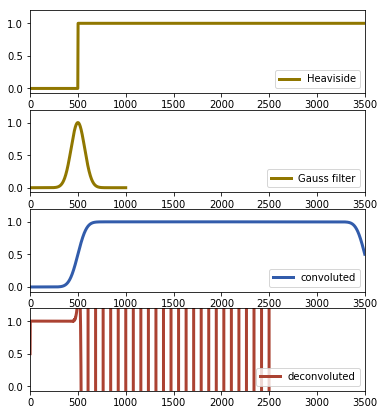

In [2]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline


# Define heaviside function
H = lambda x: 0.5 * (np.sign(x) + 1.)
#define gaussian
gauss = lambda x, sig: np.exp(-( x/float(sig))**2 )

X = np.linspace(-5, 30, num=3501)
X2 = np.linspace(-5,5, num=1001)

# convolute a heaviside with a gaussian
H_c = np.convolve( H(X),  gauss(X2, 1),  mode="same"  )
# deconvolute a the result
H_dc, er = scipy.signal.deconvolve(H_c, gauss(X2, 1) )


#### Plot #### 
fig , ax = plt.subplots(nrows=4, figsize=(6,7))
ax[0].plot( H(X),          color="#907700", label="Heaviside",    lw=3 ) 
ax[1].plot( gauss(X2, 1),  color="#907700", label="Gauss filter", lw=3 )
ax[2].plot( H_c/H_c.max(), color="#325cab", label="convoluted" ,  lw=3 ) 
ax[3].plot( H_dc,          color="#ab4232", label="deconvoluted", lw=3 ) 
for i in range(len(ax)):
    ax[i].set_xlim([0, len(X)])
    ax[i].set_ylim([-0.07, 1.2])
    ax[i].legend(loc=4)
plt.show()

In [3]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# let the signal be box-like
signal = np.repeat([0., 1., 0.], 100)
# and use a gaussian filter
# the filter should be shorter than the signal
# the filter should be such that it's much bigger then zero everywhere
gauss = np.exp(-( (np.linspace(0,50)-25.)/float(12))**2 )
#print gauss.min()  # = 0.013 >> 0

# calculate the convolution (np.convolve and scipy.signal.convolve identical)
# the keywordargument mode="same" ensures that the convolution spans the same
#   shape as the input array.
#filtered = scipy.signal.convolve(signal, gauss, mode='same') 
filtered = np.convolve(signal, gauss, mode='same') 

deconv,  _ = scipy.signal.deconvolve( filtered, gauss )
#the deconvolution has n = len(signal) - len(gauss) + 1 points
n = len(signal)-len(gauss)+1
# so we need to expand it by 
s = (len(signal)-n)/2
#on both sides.
deconv_res = np.zeros(len(signal))
deconv_res[s:len(signal)-s-1] = deconv
deconv = deconv_res
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 


#### Plot #### 
fig , ax = plt.subplots(nrows=4, figsize=(6,7))

ax[0].plot(signal,            color="#907700", label="original",     lw=3 ) 
ax[1].plot(gauss,          color="#68934e", label="gauss filter", lw=3 )
# we need to divide by the sum of the filter window to get the convolution normalized to 1
ax[2].plot(filtered/np.sum(gauss), color="#325cab", label="convoluted" ,  lw=3 )
ax[3].plot(deconv,         color="#ab4232", label="deconvoluted", lw=3 ) 

for i in range(len(ax)):
    ax[i].set_xlim([0, len(signal)])
    ax[i].set_ylim([-0.07, 1.2])
    ax[i].legend(loc=1, fontsize=11)
    if i != len(ax)-1 :
        ax[i].set_xticklabels([])

plt.savefig(__file__ + ".png")
plt.show()    

TypeError: slice indices must be integers or None or have an __index__ method

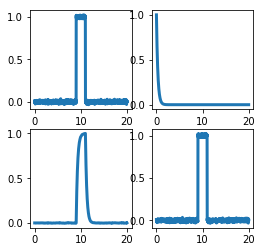

In [4]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0., 20.01, 0.01)
y = np.zeros(len(x))
y[900:1100] = 1.
y += 0.01 * np.random.randn(len(y))
c = np.exp(-(np.arange(len(y))) / 30.)

yc = scipy.signal.convolve(y, c, mode='full') / c.sum()
ydc, remainder = scipy.signal.deconvolve(yc, c)
ydc *= c.sum()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(4, 4))
ax[0][0].plot(x, y, label="original y", lw=3)
ax[0][1].plot(x, c, label="c", lw=3)
ax[1][0].plot(x[0:2000], yc[0:2000], label="yc", lw=3)
ax[1][1].plot(x, ydc, label="recovered y", lw=3)

plt.show()